# QUEST 05 

* Semantic Segmentation 

# 1. 이미지 데이터 가져오기 

* **`pixellib`**는 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리.

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

img1 :  (1013, 1600, 3)
img2 :  (1054, 1581, 3)
img3 :  (690, 1024, 3)


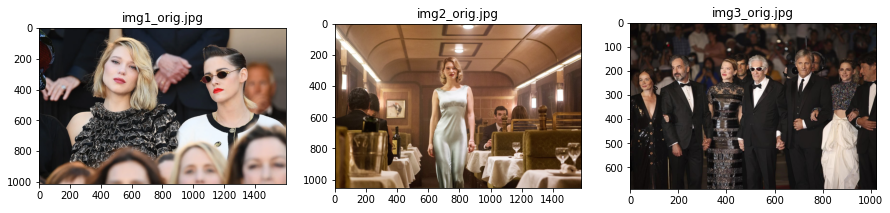

In [4]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img1_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/img1.jpg'
img2_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/img2.jpg'
img3_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/img3.jpg'

img1_orig = cv2.imread(img1_path)
img2_orig = cv2.imread(img2_path) 
img3_orig = cv2.imread(img3_path) 

print("img1 : ", img1_orig.shape)
print("img2 : ", img2_orig.shape)
print("img3 : ", img3_orig.shape)

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1_orig, cv2.COLOR_BGR2RGB))
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2_orig, cv2.COLOR_BGR2RGB))
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3_orig, cv2.COLOR_BGR2RGB))
plt.title('img3_orig.jpg')

plt.show()

# 2. Semantic segmentation

이미지에서 픽셀 단위로 관심 객체를 추출하는 방법을 **이미지 세그멘테이션(image segmentation)**. 이미지 세그멘테이션은 모든 픽셀에 라벨(label)을 할당하고 같은 라벨은 "공통적인 특징"을 가진다고 가정.

세그멘테이션에는 여러 가지 세부 태스크가 있으며, 태스크에 따라 다양한 기준으로 객체를 추출.

* **Semantic Segmentation** : 우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션. 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법. 추상적인 정보를 이미지에서 추출해 내는 방법으로 사람이 누구인지 관계없이 같은 라벨로 표현

* **Instance Segmentation** : 사람 개개인별로 다른 라벨을 가지게 합니다. 여러 사람이 한 이미지에 등장할 때 각 객체를 분할해서 인식하자는 것이 목표


* **Semantic Segmentation**
    * 세그멘테이션 문제에는 **FCN, SegNet, U-Net** 등 많은 모델이 사용됨. 그중에서 **DeepLab**이라는 세그멘테이션 모델을 이용.

    * **PixelLib**를 이용하면 편하게 사용가능

In [5]:

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 

model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fbfb4ea2790>)

In [6]:

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') # PixelLib가 제공하는 모델의 url

model = semantic_segmentation() # 사용할 세그멘테이션 모델을 생성
model.load_pascalvoc_model(model_file) # PixelLib model

In [8]:
segvalues1, output1 = model.segmentAsPascalvoc(img1_path)
segvalues2, output2 = model.segmentAsPascalvoc(img2_path)
segvalues3, output3 = model.segmentAsPascalvoc(img3_path)

PASCAL VOC 데이터의 라벨 종류
About Pascal VOC : http://host.robots.ox.ac.uk/pascal/VOC/ 

In [9]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES) # 21

21

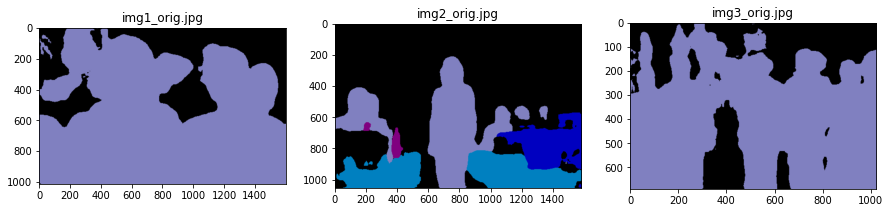

In [10]:
# 모델에서 나온 출력값
plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(output1)
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(output2)
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(output3)
plt.title('img3_orig.jpg')

plt.show()

* **`output`** : 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있음.
* **`segvalues`** : class_ids와 masks가 있습니다. class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있다.

In [11]:
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])

print()
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

print()
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person

background
bottle
chair
diningtable
person

background
person


In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 색상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
# 사람을 나타내는 15번째 색상
colormap[15] # array([192, 128, 128])

array([192, 128, 128])

* output 이미지 : BGR 순서로 채널 배치
* colormap 이미지 : RGB 순서로 채널 배치

In [14]:
seg_person_color = (128,128,192)

(1013, 1600)
(1054, 1581)
(690, 1024)


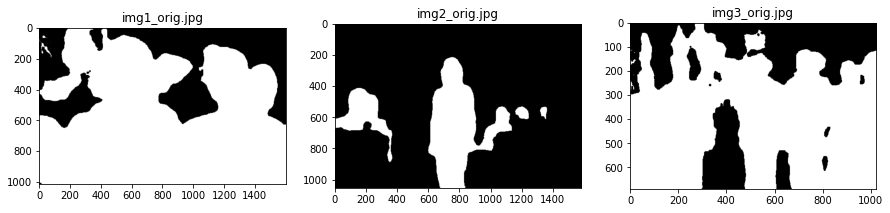

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg1_map = np.all(output1==seg_person_color, axis=-1)
print(seg1_map.shape)
seg2_map = np.all(output2==seg_person_color, axis=-1)
print(seg2_map.shape)
seg3_map = np.all(output3==seg_person_color, axis=-1)
print(seg3_map.shape)

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(seg1_map, cmap='gray')
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(seg2_map, cmap='gray')
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(seg3_map, cmap='gray')
plt.title('img3_orig.jpg')

plt.show()

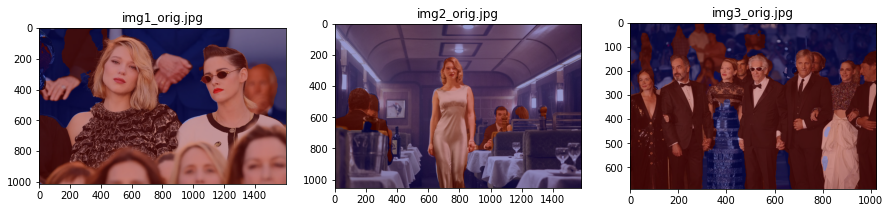

In [16]:
img1_show = img1_orig.copy()
img2_show = img2_orig.copy()
img3_show = img3_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img1_mask = seg1_map.astype(np.uint8) * 255
img2_mask = seg2_map.astype(np.uint8) * 255
img3_mask = seg3_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color1_mask = cv2.applyColorMap(img1_mask, cv2.COLORMAP_JET)
color2_mask = cv2.applyColorMap(img2_mask, cv2.COLORMAP_JET)
color3_mask = cv2.applyColorMap(img3_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img1_show = cv2.addWeighted(img1_show, 0.6, color1_mask, 0.4, 0.0)
img2_show = cv2.addWeighted(img2_show, 0.6, color2_mask, 0.4, 0.0)
img3_show = cv2.addWeighted(img3_show, 0.6, color3_mask, 0.4, 0.0)

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB))
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB))
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB))
plt.title('img3_orig.jpg')

plt.show()

# 3. 배경 흐리게 하기

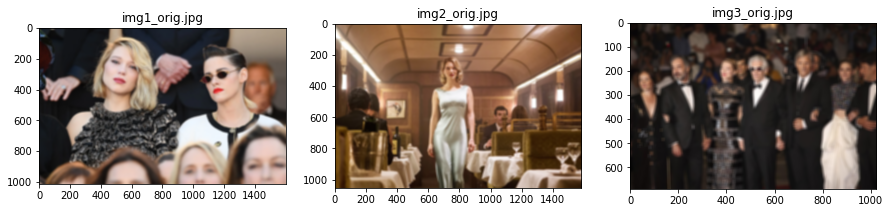

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img1_orig_blur = cv2.blur(img1_orig, (15,15))
img2_orig_blur = cv2.blur(img2_orig, (15,15))
img3_orig_blur = cv2.blur(img3_orig, (15,15))

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1_orig_blur, cv2.COLOR_BGR2RGB))
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2_orig_blur, cv2.COLOR_BGR2RGB))
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3_orig_blur, cv2.COLOR_BGR2RGB))
plt.title('img3_orig.jpg')

plt.show()

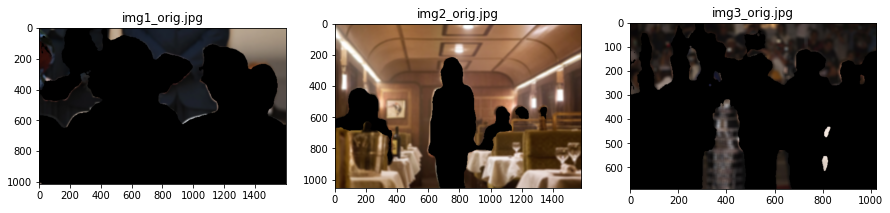

In [18]:
img1_mask_color = cv2.cvtColor(img1_mask, cv2.COLOR_GRAY2BGR)
img1_bg_mask = cv2.bitwise_not(img1_mask_color)
img1_bg_blur = cv2.bitwise_and(img1_orig_blur, img1_bg_mask)
img2_mask_color = cv2.cvtColor(img2_mask, cv2.COLOR_GRAY2BGR)
img2_bg_mask = cv2.bitwise_not(img2_mask_color)
img2_bg_blur = cv2.bitwise_and(img2_orig_blur, img2_bg_mask)
img3_mask_color = cv2.cvtColor(img3_mask, cv2.COLOR_GRAY2BGR)
img3_bg_mask = cv2.bitwise_not(img3_mask_color)
img3_bg_blur = cv2.bitwise_and(img3_orig_blur, img3_bg_mask)

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1_bg_blur, cv2.COLOR_BGR2RGB))
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2_bg_blur, cv2.COLOR_BGR2RGB))
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3_bg_blur, cv2.COLOR_BGR2RGB))
plt.title('img3_orig.jpg')

plt.show()

# 4. 흐린 배경과 원본 영상 합성

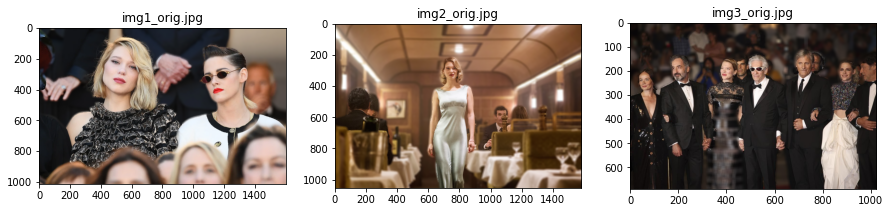

In [19]:
img1_concat = np.where(img1_mask_color==255, img1_orig, img1_bg_blur)
img2_concat = np.where(img2_mask_color==255, img2_orig, img2_bg_blur)
img3_concat = np.where(img3_mask_color==255, img3_orig, img3_bg_blur)

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1_concat, cv2.COLOR_BGR2RGB))
plt.title('img1_orig.jpg')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2_concat, cv2.COLOR_BGR2RGB))
plt.title('img2_orig.jpg')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3_concat, cv2.COLOR_BGR2RGB))
plt.title('img3_orig.jpg')

plt.show()

# 5. Semantic Segmentation Function

* **지금까지 Semantic segmentation중 DeepLab을 사용한 코드들을 함수로써 정의한다.**
* 이때 함수의 입력에는 이미지와 DeepLab에 정의되어있는 라벨, 즉 분할하려는 객체의 이름을 인자에 할당한다.
* 인물사진 뿐만 아니라 DeepLab에 정의되어있는 객체에 한정하여 모두 가능하다.
* 사람이 아닌 다른 객체에 대해서도 적용해본다.


* **적용 가능한 label은 다음과 같다.**
* **'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'**

In [21]:
def shallow_focus(img, deepLab_label):
    img_path = os.getenv('HOME') + f'/aiffel/human_segmentation/images/{img}'
    img_orig = cv2.imread(img_path) 
    
    # Semantic segmentation DeepLab
    
    # 준비한 이미지를 네트워크에 입력
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    
    # 라벨 이름
    LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    # 삭제예정
    plt.figure(figsize=(15,20))
    
    plt.subplot(2,3,1)
    plt.imshow(output)
    plt.title('Extracting labeled object areas')
    
    
    # 라벨 조회
    label = LABEL_NAMES.index(deepLab_label)
    
    
    # 색상코드 BGR -> RGB 목적
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    seg_color = tuple(colormap[label][::-1])
    
    
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    
    # 삭제예정
    plt.subplot(2,3,2)
    plt.imshow(seg_map, cmap='gray')
    plt.title('Mask made of seg_color only')

    img_show = img_orig.copy()

    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.title('Overlapping the original image')


    #  배경 흐리게 하기
    # (13,13)은 blurring kernel size를 뜻합니다
    # 다양하게 바꿔보세요
    img_orig_blur = cv2.blur(img_orig, (15,15))  
    
    plt.subplot(2,3,4)
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.title('Blurred background')

    
    # 흐려진 이미지에서 배경 추출
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    plt.subplot(2,3,5)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.title('Extracting the background from the blurred image')

    
    # 흐린 배경과 사람 이미지 합성
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title('Combining the blurry background and image')
    plt.show()

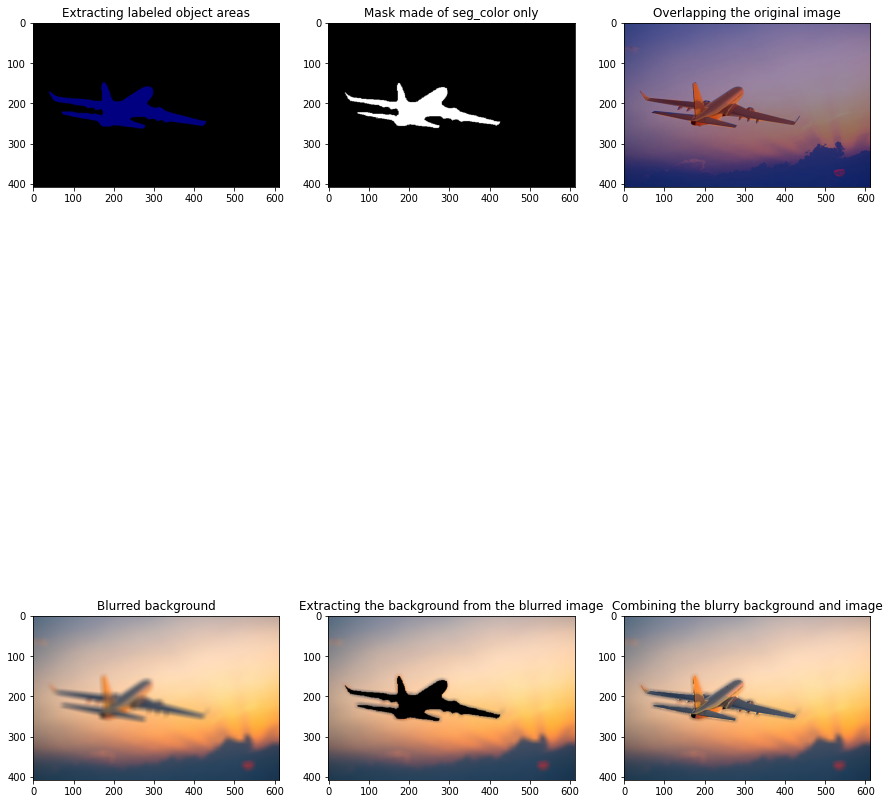

In [24]:
shallow_focus('aeroplane.jpg','aeroplane')

**인물 뿐 아니라 정의되어있는, 다양한 이미지에서도 image segmentation 을 통한 Shallow Focus 적용이 가능했다.**

# 6. 배경 이미지 변경(크로마키 배경 합성)

* 위 과정은 기존 배경에서 blurring을 처리한 배경을 사용했다.
* 이번에는 배경 이미지 즉, **크로마키 배경 합성을 진행**해본다.
* 위 과정과 전체적인 흐름은 동일하고, **새로운 배경 이미지를 불러와서 원본 이미지의 size에 맞게 resize** 한 후 image segmentation 부분과 **합성**한다.

**지금까지 Semantic segmentation중 DeepLab을 사용한 코드들을 함수로써 정의한다.**
* 이때 함수의 입력에는 이미지와 DeepLab에 정의되어있는 라벨, 즉 분할하려는 객체의 이름을 인자에 할당한다.


위의 방법으로 배경 이미지를 변경하는 함수 change_background(img, deepLab_label, background) 를 구현한다.

In [25]:
def shallow_focus_chromakey(img, deepLab_label, background):
    img_path = os.getenv('HOME') + f'/aiffel/human_segmentation/images/{img}'
    img_orig = cv2.imread(img_path) 
    
    # Semantic segmentation DeepLab
    
    # 준비한 이미지를 네트워크에 입력
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    
    # 라벨 이름
    LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    # 삭제예정
    plt.figure(figsize=(15,20))
    
    plt.subplot(2,3,1)
    plt.imshow(output)
    plt.title('Extracting labeled object areas')
    
    
    # 라벨 조회
    label = LABEL_NAMES.index(deepLab_label)
    
    
    # 색상코드 BGR -> RGB 목적
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    seg_color = tuple(colormap[label][::-1])
    
    
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    
    # 삭제예정
    plt.subplot(2,3,2)
    plt.imshow(seg_map, cmap='gray')
    plt.title('Mask made of seg_color only')

    img_show = img_orig.copy()

    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.title('Overlapping the original image')


    #  배경 흐리게 하기
    # (13,13)은 blurring kernel size를 뜻합니다
    # 다양하게 바꿔보세요
    img_orig_blur = cv2.blur(img_orig, (15,15))  
    
    plt.subplot(2,3,4)
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.title('Blurred background')

    
    # 흐려진 이미지에서 배경 추출
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    plt.subplot(2,3,5)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.title('Extracting the background from the blurred image')

    
    # 흐린 배경과 사람 이미지 합성
    #img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    # 배경 이미지 불러오기
    background_path = os.getenv('HOME')+f'/aiffel/human_segmentation/images/{background}'
    background_orig = cv2.imread(background_path) 
    background_resized = cv2.resize(background_orig,(img_orig.shape[1], img_orig.shape[0]))
    
    
    # 배경 이미지와 Inage segmentation 된 이미지 합성
    #img_mask_color = cv2.cvtColor(img_orig, cv2.COLOR_GRAY2BGR)
    img_concat = np.where(img_mask_color==255, img_orig, background_resized)
    
    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title('Combining the blurry background and image')
    plt.show()

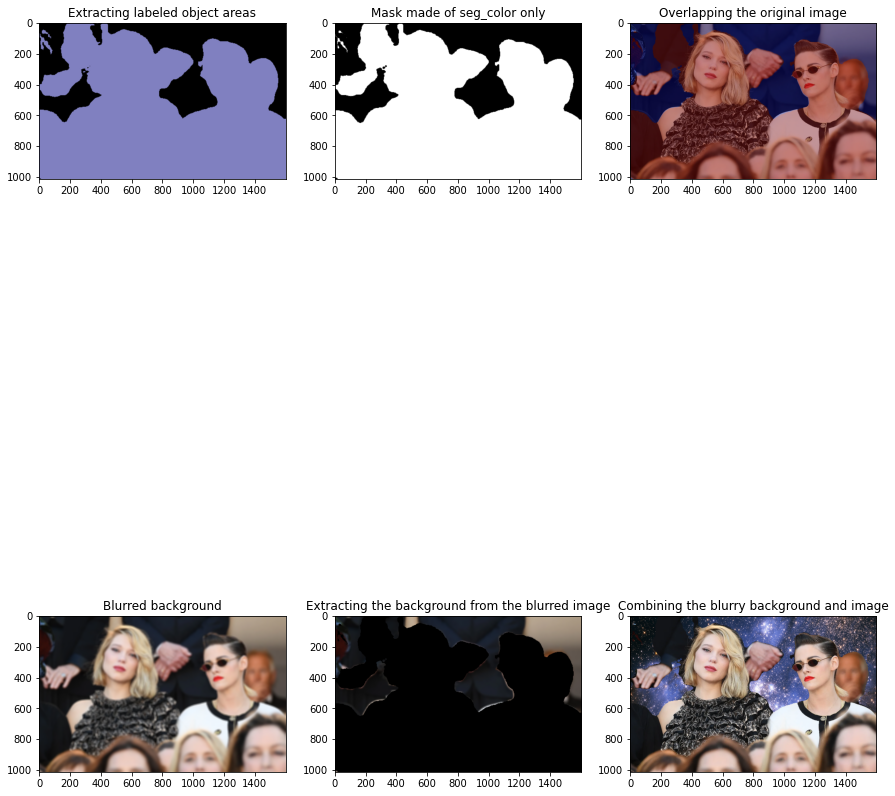

In [40]:
shallow_focus_chromakey('img1.jpg', 'person', 'stars.jpg')

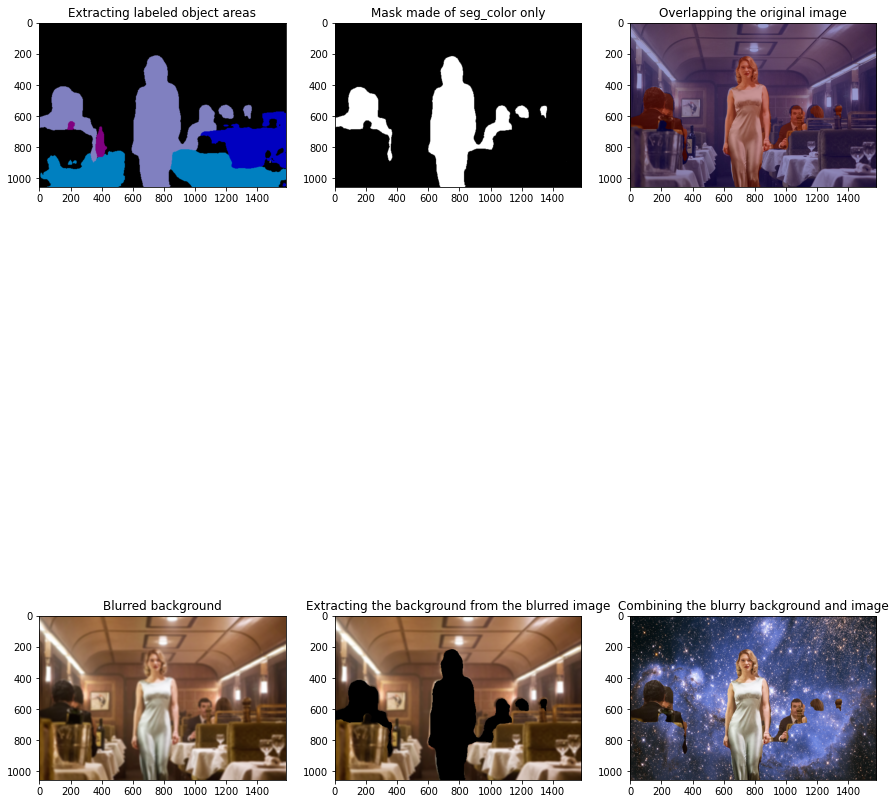

In [26]:
shallow_focus_chromakey('img2.jpg', 'person', 'stars.jpg')

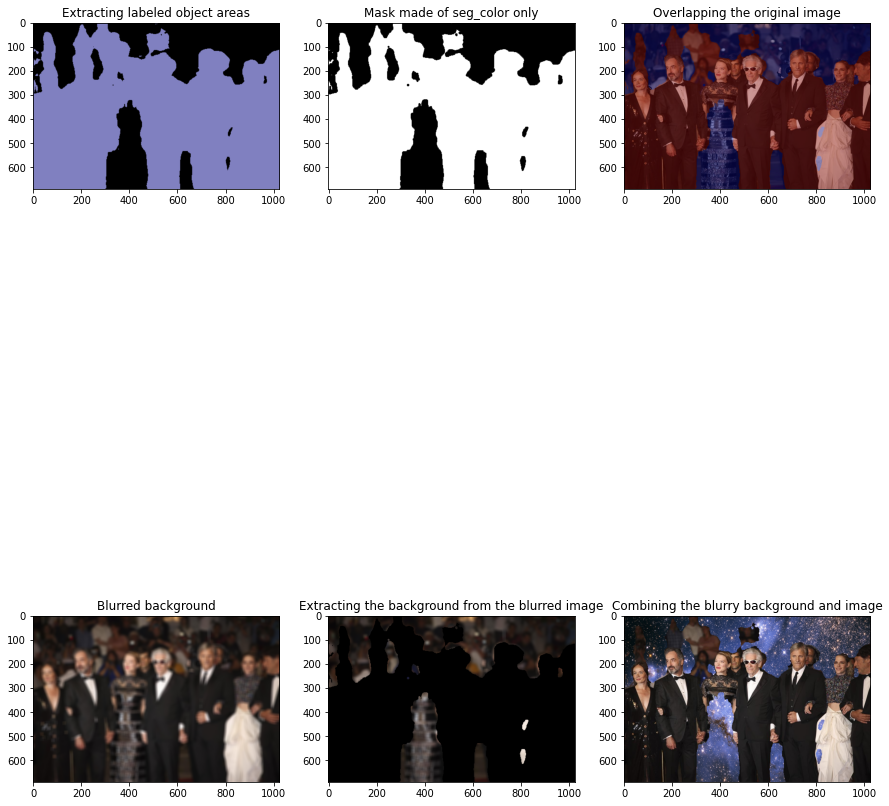

In [27]:
shallow_focus_chromakey('img3.jpg', 'person', 'stars.jpg')